In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [262]:
df=pd.read_csv("electric_vehicles_spec_2025.csv.csv")

In [263]:
df.head(5)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [264]:
print(df.shape)
print(df.columns)

(478, 22)
Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')


In [265]:
df.duplicated().sum()

np.int64(0)

In [266]:
df.nunique()

brand                         59
model                        477
top_speed_kmh                 38
battery_capacity_kWh         121
battery_type                   1
number_of_cells               38
torque_nm                    128
efficiency_wh_per_km         112
range_km                      88
acceleration_0_100_s          97
fast_charging_power_kw_dc     71
fast_charge_port               2
towing_capacity_kg            26
cargo_volume_l               140
seats                          7
drivetrain                     3
segment                       15
length_mm                    172
width_mm                     108
height_mm                    162
car_body_type                  8
source_url                   478
dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [268]:
df.describe()

,top_speed_kmh,battery_capacity_kWh,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,towing_capacity_kg,seats,length_mm,width_mm,height_mm
count,478.000000,478.000000,276.000000,471.000000,478.000000,478.000000,478.000000,477.000000,452.000000,478.000000,478.000000,478.000000,478.000000
mean,185.487448,74.043724,485.293478,498.012739,162.903766,393.179916,6.882636,125.008386,1052.261062,5.263598,4678.506276,1887.359833,1601.125523
std,34.252773,20.331058,1210.819733,241.461128,34.317532,103.287335,2.730696,58.205012,737.851774,1.003961,369.210573,73.656807,130.754851
min,125.000000,21.300000,72.000000,113.000000,109.000000,135.000000,2.200000,29.000000,0.000000,2.000000,3620.000000,1610.000000,1329.000000
25%,160.000000,60.000000,150.000000,305.000000,143.000000,320.000000,4.800000,80.000000,500.000000,5.000000,4440.000000,1849.000000,1514.000000
50%,180.000000,76.150000,216.000000,430.000000,155.000000,397.500000,6.600000,113.000000,1000.000000,5.000000,4720.000000,1890.000000,1596.000000
75%,201.000000,90.600000,324.000000,679.000000,177.750000,470.000000,8.200000,150.000000,1600.000000,5.000000,4961.000000,1939.000000,1665.000000
max,325.000000,118.000000,7920.000000,1350.000000,370.000000,685.000000,19.100000,281.000000,2500.000000,9.000000,5908.000000,2080.000000,1986.000000


In [269]:
df.isna().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [311]:
df['number_of_cells']=df['number_of_cells'].fillna(df['number_of_cells'].mode()[0])
df['model']=df['model'].fillna(df['model'].mode()[0])
df['torque_nm']=df['torque_nm'].fillna(df['torque_nm'].median())
df['towing_capacity_kg']=df['towing_capacity_kg'].fillna(df['towing_capacity_kg'].mean())
df['fast_charge_port']=df['fast_charge_port'].fillna(df['fast_charge_port'].mode()[0])
df['fast_charging_power_kw_dc']=df['fast_charging_power_kw_dc'].fillna(df['fast_charging_power_kw_dc'].mode()[0])
df['cargo_volume_l']=df['cargo_volume_l'].fillna(df['cargo_volume_l'].mode()[0])

In [312]:
df.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
battery_type                 0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
cargo_volume_l               0
seats                        0
segment                      0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
source_url                   0
top_speed_kmh_skew           0
number_of_cells_skew         0
acceleration_0_100_s_skew    0
efficiency_wh_per_km_skew    0
torque_nm_skew               0
cargo_volume_l_skew          3
dtype: int64

In [272]:
df.drop(columns='source_url',axis=1)
df.head(5)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.000000,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.000000,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.000000,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.000000,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,216.0,310.0,156,315,7.5,...,1052.261062,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


np.float64(0.6450032070941066)

np.float64(0.004784673331132612)

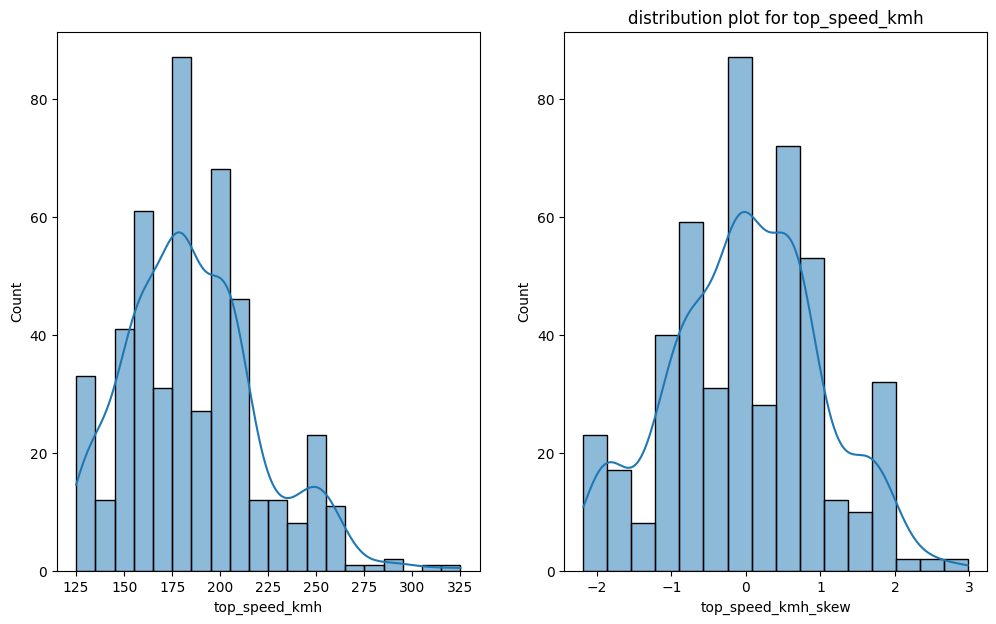

In [273]:
display(df['top_speed_kmh'].skew())
pt = PowerTransformer(method='yeo-johnson') 
df['top_speed_kmh_skew'] = pt.fit_transform(df[['top_speed_kmh']])
display(df['top_speed_kmh_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2, 1)
sns.histplot(x='top_speed_kmh',data=df,kde=True)
plt.subplot(1,2,2)
sns.histplot(x='top_speed_kmh_skew',data=df,kde=True)
plt.title("distribution plot for top_speed_kmh")
plt.show()

np.float64(-0.10633302539136134)

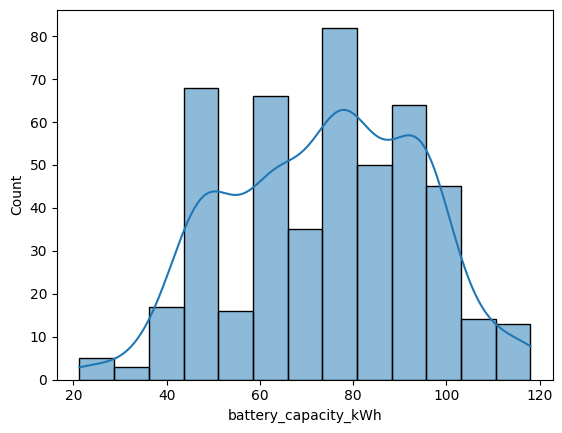

In [274]:
display(df['battery_capacity_kWh'].skew())
sns.histplot(x='battery_capacity_kWh',data=df,kde=True)
plt.show()

np.float64(6.682599988386708)

np.float64(-0.24023331496152456)

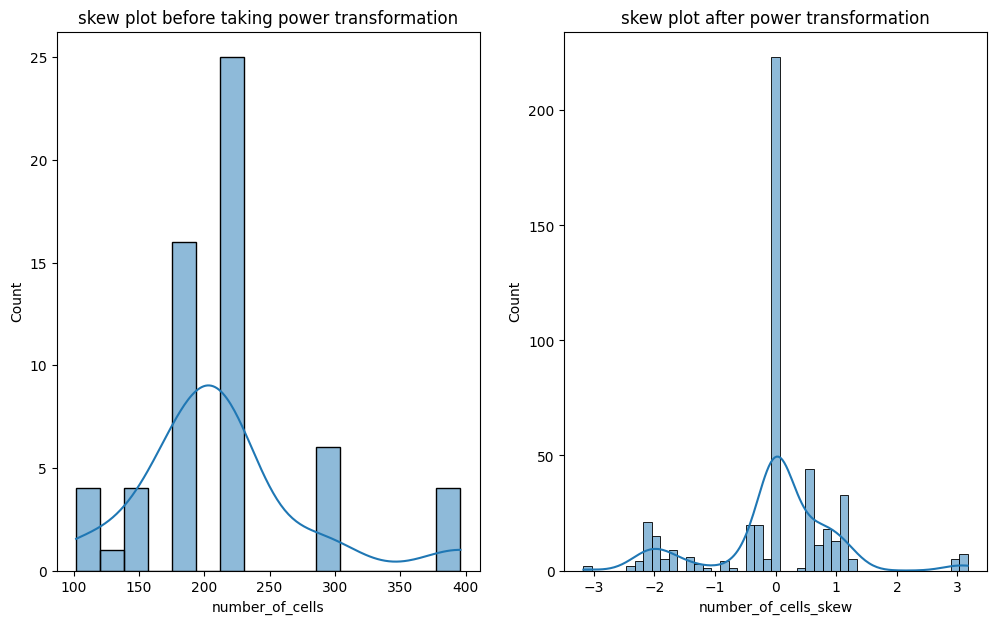

In [275]:
display(df['number_of_cells'].skew())
pt = PowerTransformer(method='yeo-johnson') 
df['number_of_cells_skew'] = pt.fit_transform(df[['number_of_cells']])
display(df['number_of_cells_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("skew plot before taking power transformation")
sns.histplot(x='number_of_cells',data=df.head(60),kde=True)
plt.subplot(1,2,2)
plt.title("skew plot after power transformation")
sns.histplot(x='number_of_cells_skew',data=df,kde=True)
plt.show()

np.float64(0.8801193511312971)

np.float64(0.001416193034835525)

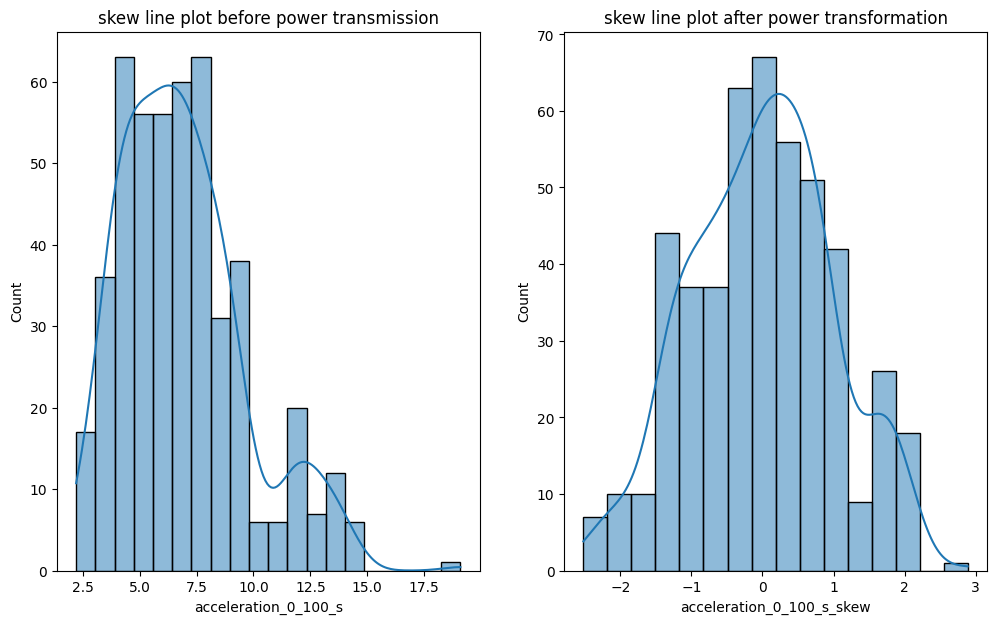

In [276]:
pt = PowerTransformer(method='yeo-johnson')
display(df['acceleration_0_100_s'].skew()) 
df['acceleration_0_100_s_skew'] = pt.fit_transform(df[['acceleration_0_100_s']])
display(df['acceleration_0_100_s_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("skew line plot before power transmission")
sns.histplot(x='acceleration_0_100_s',data=df,kde=True)
plt.subplot(1,2,2)
plt.title("skew line plot after power transformation")
sns.histplot(x='acceleration_0_100_s_skew',data=df,kde=True)
plt.show()

np.float64(-0.1556228491053018)

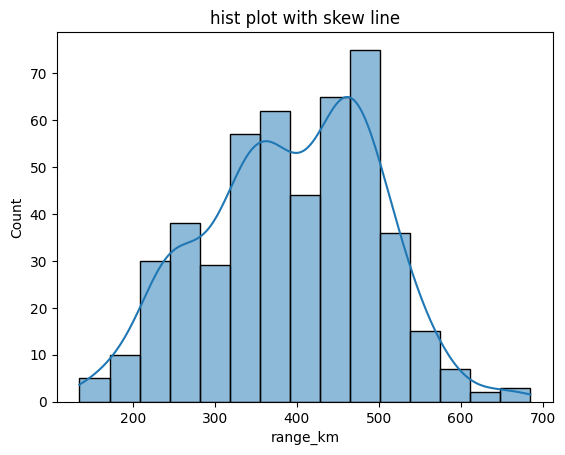

In [277]:
display(df['range_km'].skew())
sns.histplot(x='range_km',data=df,kde=True)
plt.title("hist plot with skew line")
plt.show()

np.float64(2.4094804403782417)

np.float64(-0.007054526062506879)

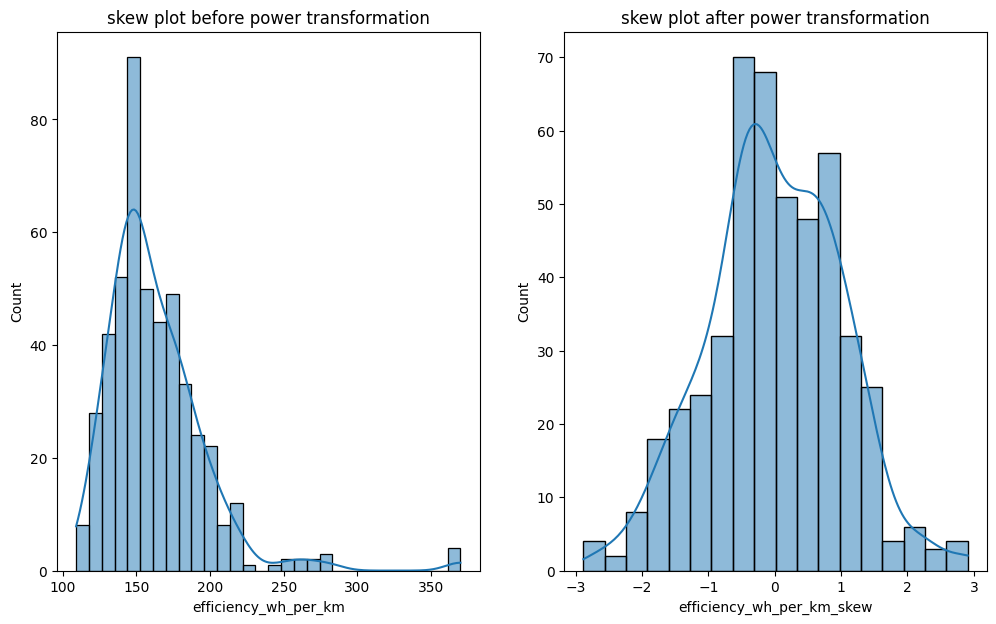

In [278]:
display(df['efficiency_wh_per_km'].skew())
df['efficiency_wh_per_km_skew']=pt.fit_transform(df[['efficiency_wh_per_km']])
display(df['efficiency_wh_per_km_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("skew plot before power transformation")
sns.histplot(x='efficiency_wh_per_km',data=df,kde=True)
plt.subplot(1,2,2)
plt.title("skew plot after power transformation")
sns.histplot(x='efficiency_wh_per_km_skew',data=df,kde=True)
plt.show()

np.float64(0.8513138007818885)

np.float64(-0.0074611920049853925)

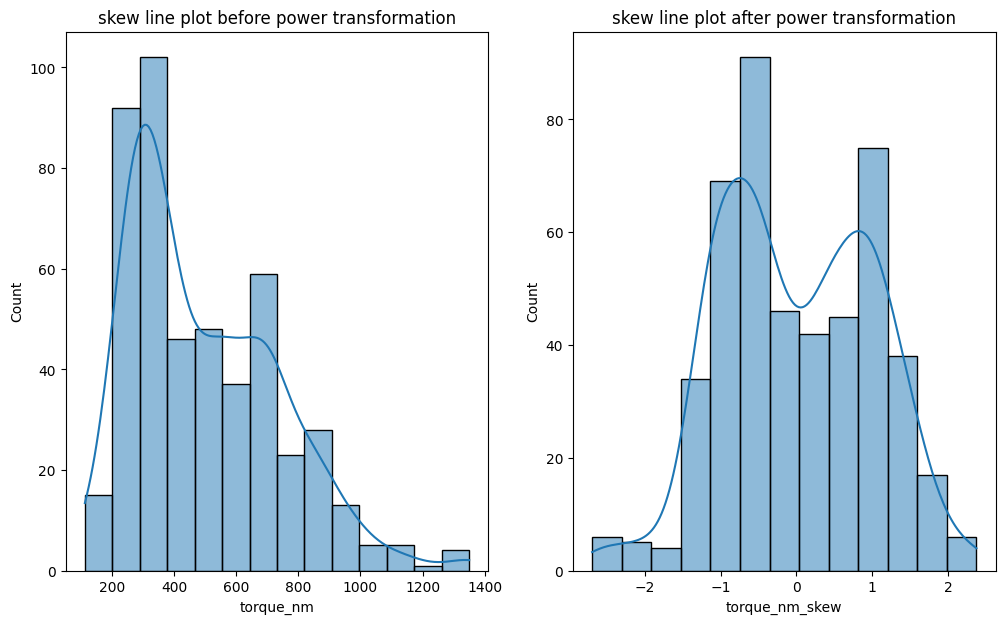

In [279]:
display(df['torque_nm'].skew())
df['torque_nm_skew']=pt.fit_transform(df[['torque_nm']])
display(df['torque_nm_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("skew line plot before power transformation")
sns.histplot(x='torque_nm',data=df,kde=True)
plt.subplot(1,2,2)
plt.title("skew line plot after power transformation")
sns.histplot(x='torque_nm_skew',data=df,kde=True)
plt.show()
plt.show()


In [280]:
df['cargo_volume_l']=pd.to_numeric(df['cargo_volume_l'],errors='coerce')

np.float64(1.9368758156467276)

np.float64(-0.01647101396970133)

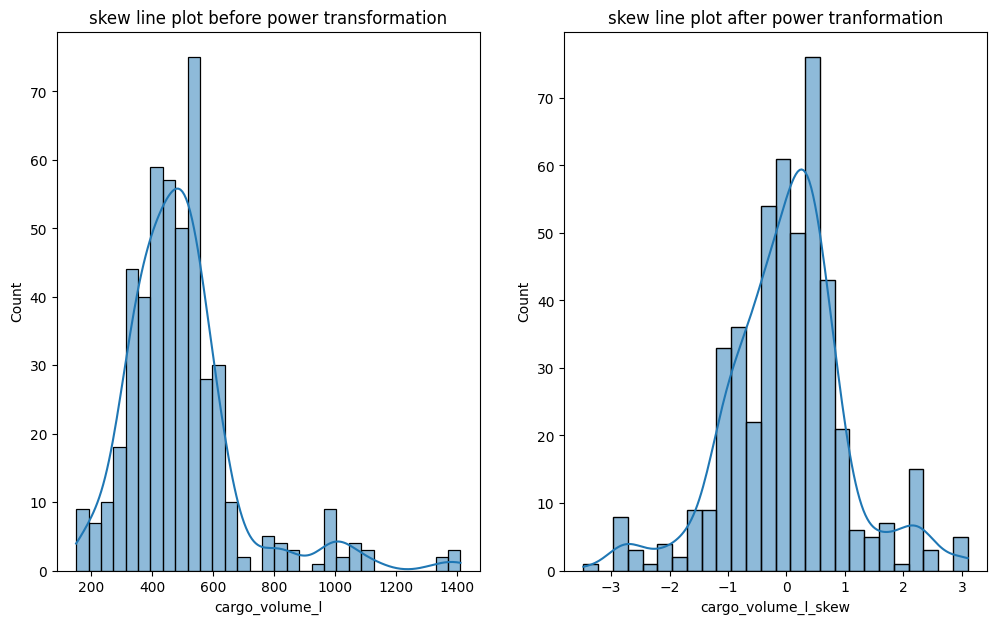

In [281]:
display(df['cargo_volume_l'].skew())
df['cargo_volume_l_skew']=pt.fit_transform(df[['cargo_volume_l']])
display(df['cargo_volume_l_skew'].skew())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title("skew line plot before power transformation")
sns.histplot(x='cargo_volume_l',data=df,kde=True)
plt.subplot(1,2,2)
plt.title("skew line plot after power tranformation")
sns.histplot(x='cargo_volume_l_skew',data=df,kde=True)
plt.show()

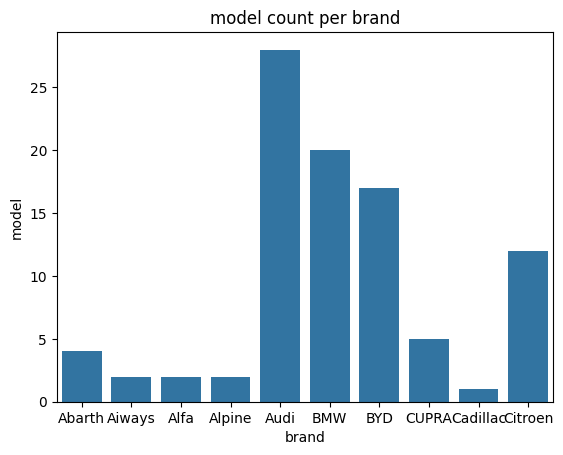

In [282]:
brand_model_count=df.groupby('brand')['model'].count().head(10)
sns.barplot(brand_model_count)
plt.title('model count per brand')
plt.show()

C:\Users\DHINESH\AppData\Local\Temp\ipykernel_25340\4137788257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brands_count.index,y=brands_count.values,palette='viridis')


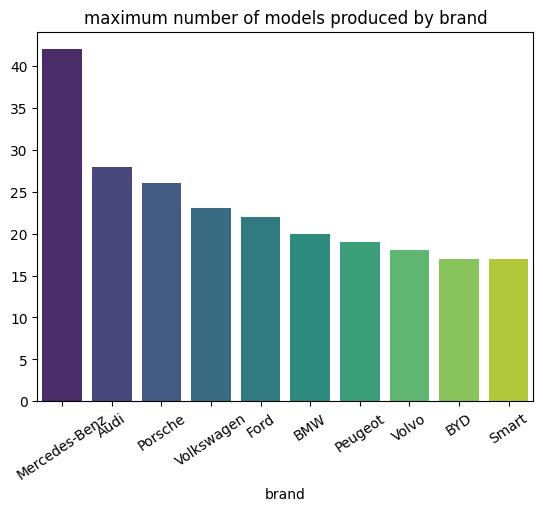

In [283]:
brands_count=df['brand'].value_counts().head(10)
sns.barplot(x=brands_count.index,y=brands_count.values,palette='viridis')
plt.title('maximum number of models produced by brand')
plt.xticks(rotation=34)
plt.show()

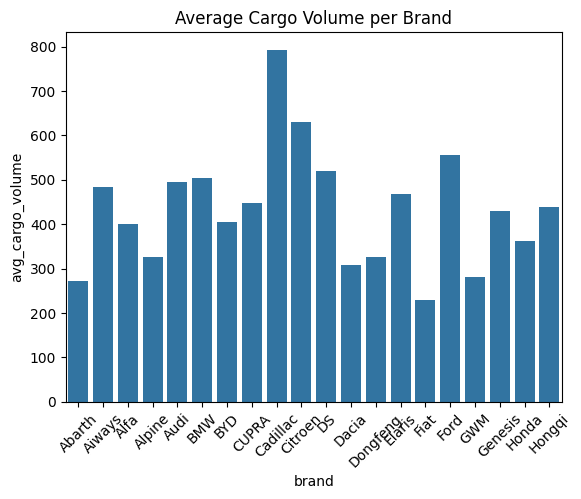

In [284]:
avg_cargo = df.groupby('brand')['cargo_volume_l'].mean().head(20)
sns.barplot(x=avg_cargo.index, y=avg_cargo.values)
plt.ylabel("avg_cargo_volume")
plt.xticks(rotation=45)
plt.title("Average Cargo Volume per Brand")
plt.show()


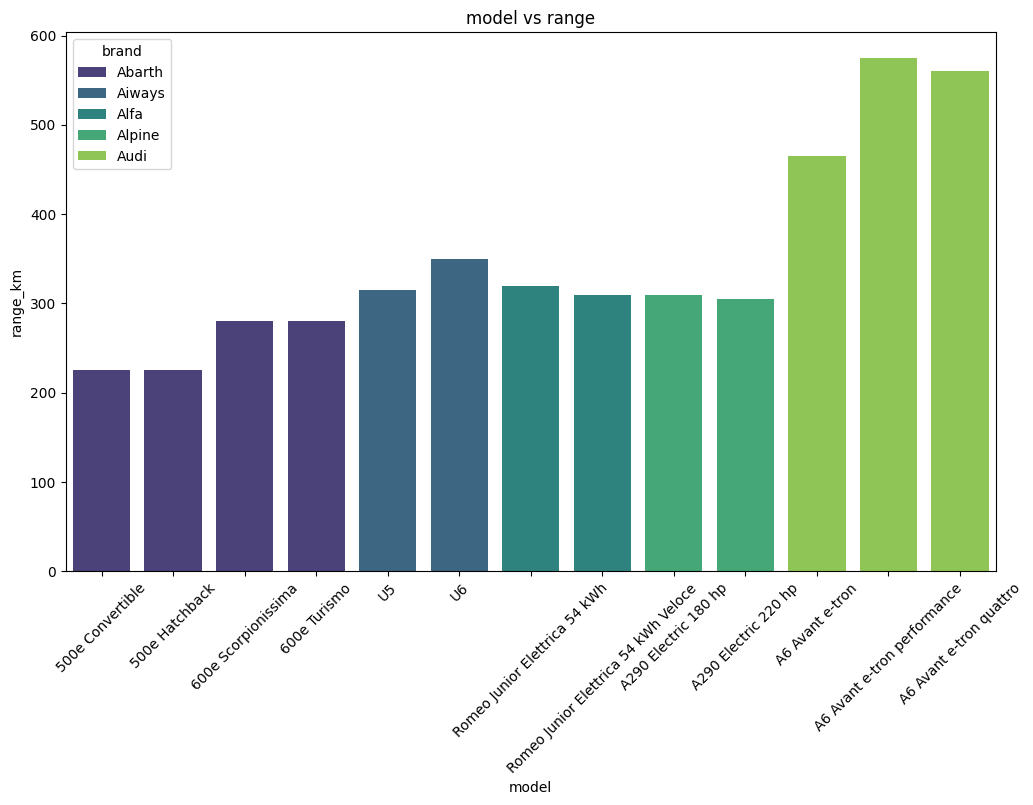

In [285]:
plt.figure(figsize=(12,7))
plt.title("model vs range")
sns.barplot(x='model',y='range_km',data=df.head(13),hue='brand',palette='viridis')
plt.xticks(rotation=45)
plt.show()

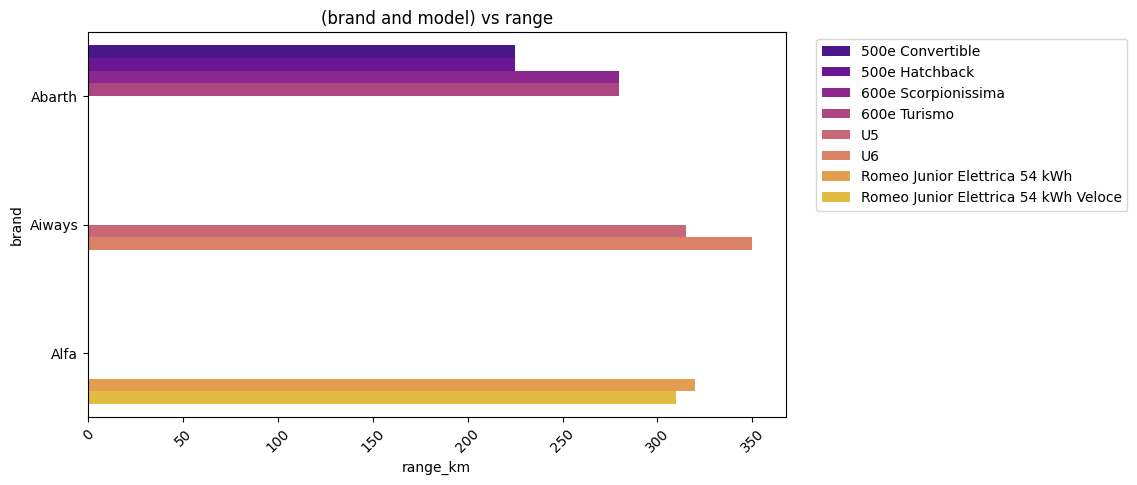

In [286]:
plt.figure(figsize=(9,5))
plt.title("(brand and model) vs range")
sns.barplot(x='range_km',y='brand',data=df.head(8),hue='model',palette='plasma')
plt.legend(loc='upper right', bbox_to_anchor=(1.50, 1))
plt.xticks(rotation=45)
plt.show()

In [287]:
df['battery_type'].value_counts()

battery_type
Lithium-ion    478
Name: count, dtype: int64

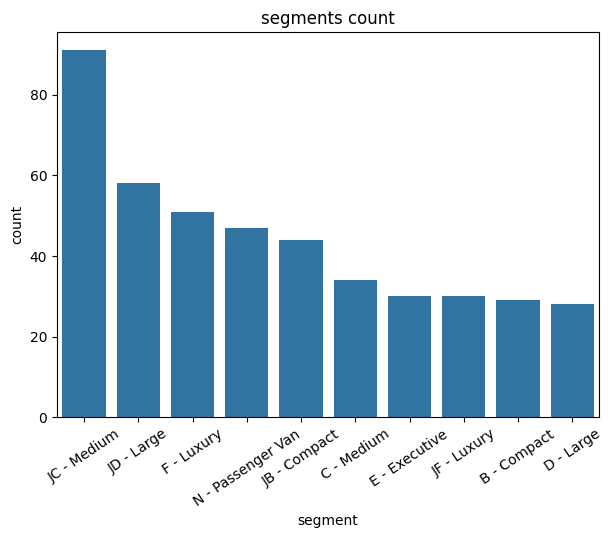

In [288]:
plt.figure(figsize=(7,5))
sns.barplot(df['segment'].value_counts().head(10))
plt.title("segments count")
plt.xticks(rotation=34)
plt.show()

In [289]:
df['drivetrain'].value_counts()

drivetrain
AWD    191
FWD    156
RWD    131
Name: count, dtype: int64

positive correlation
0.45828126025836624


<Axes: title={'center': 'length vs seats'}, xlabel='length_mm', ylabel='seats'>

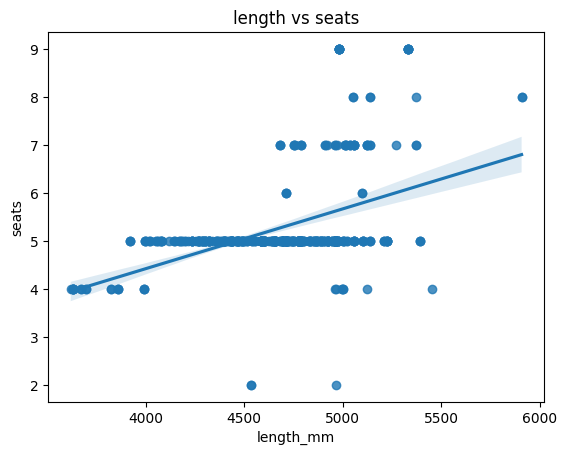

In [290]:
corr=df['length_mm'].corr(df['seats'])
print('positive correlation')
print(corr)
plt.title('length vs seats')
sns.regplot(x='length_mm',y='seats',data=df)

In [291]:
df['cargo_volume_l']=pd.to_numeric(df['cargo_volume_l'],errors='coerce')

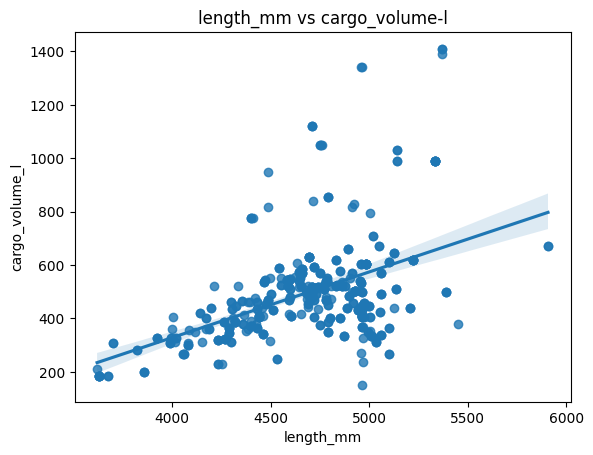

In [292]:
sns.regplot(x='length_mm',y='cargo_volume_l',data=df)
plt.title("length_mm vs cargo_volume-l")
plt.show()

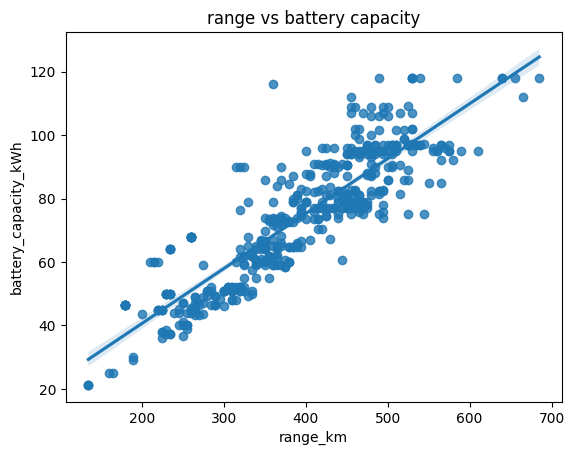

In [293]:
sns.regplot(x='range_km',y='battery_capacity_kWh',data=df)
plt.title("range vs battery capacity")
plt.show()

In [308]:
numeric_cols_no_skew = ['top_speed_kmh', 'battery_capacity_kWh', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc', 
    'towing_capacity_kg', 'cargo_volume_l', 'seats', 'length_mm', 'width_mm', 'height_mm']


In [306]:
df[numeric_cols_no_skew].dtypes

top_speed_kmh                  int64
battery_capacity_kWh         float64
number_of_cells              float64
torque_nm                    float64
efficiency_wh_per_km           int64
range_km                       int64
acceleration_0_100_s         float64
fast_charging_power_kw_dc    float64
fast_charge_port              object
towing_capacity_kg           float64
cargo_volume_l               float64
seats                          int64
length_mm                      int64
width_mm                       int64
height_mm                      int64
dtype: object

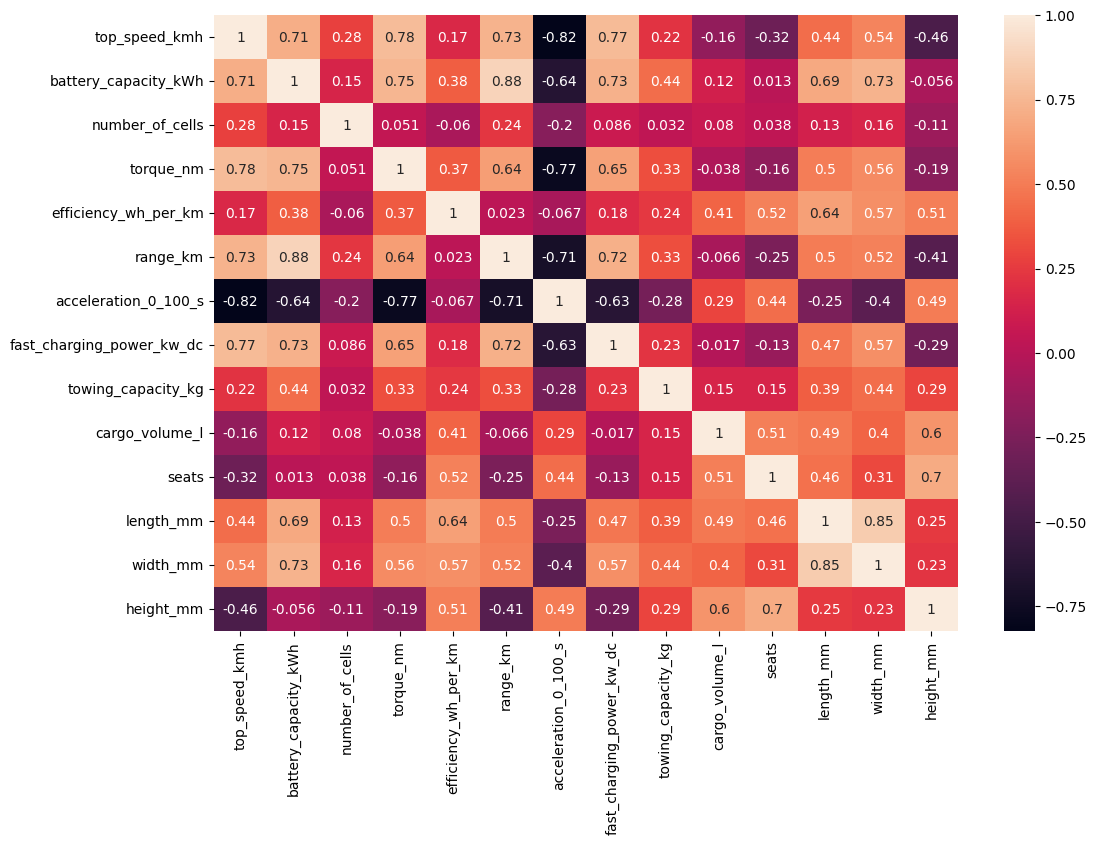

In [310]:
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols_no_skew].corr(), annot=True)
plt.show()

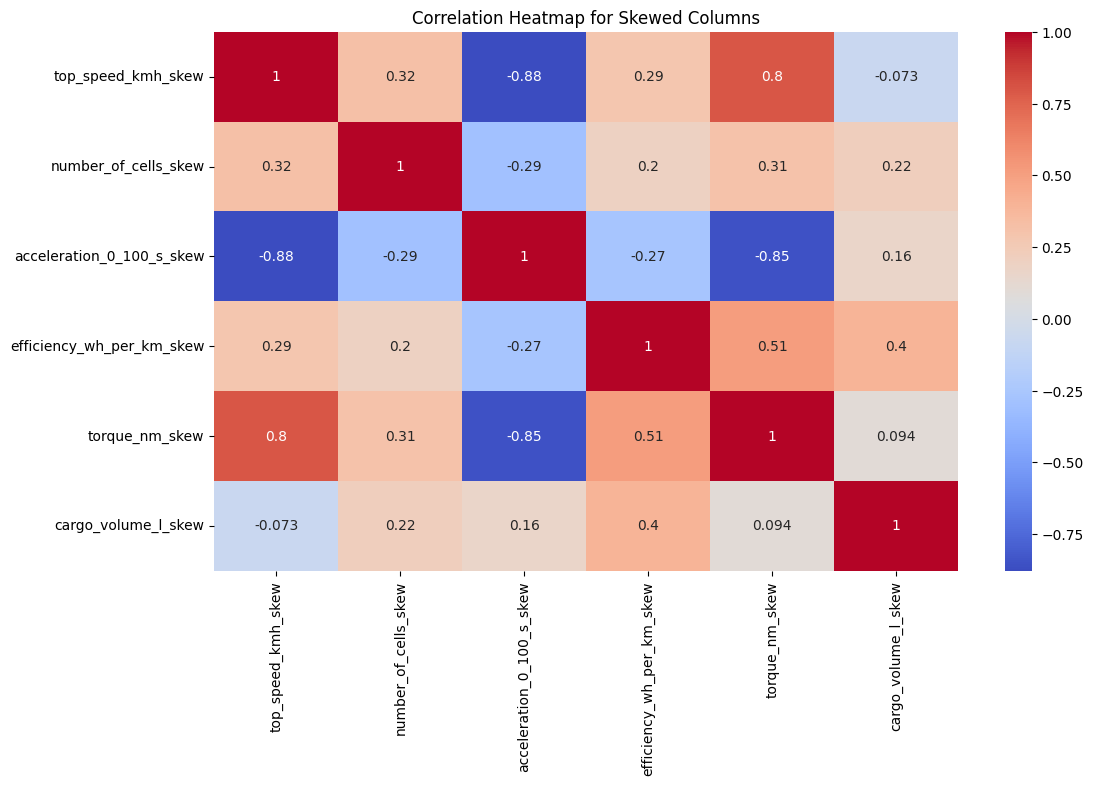

In [ ]:
skew_cols = ['top_speed_kmh_skew', 'number_of_cells_skew', 'acceleration_0_100_s_skew', 'efficiency_wh_per_km_skew', 'torque_nm_skew', 'cargo_volume_l_skew']
plt.figure(figsize=(12,7))
sns.heatmap(df[skew_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Skewed Columns")
plt.show()

In [297]:
df.groupby('brand')['car_body_type'].value_counts()

brand    car_body_type 
Abarth   Hatchback         2
         SUV               2
Aiways   SUV               2
Alfa     SUV               2
Alpine   Hatchback         2
                          ..
XPENG    SUV               6
         Sedan             3
Zeekr    SUV               6
         Liftback Sedan    3
firefly  Hatchback         1
Name: count, Length: 116, dtype: int64

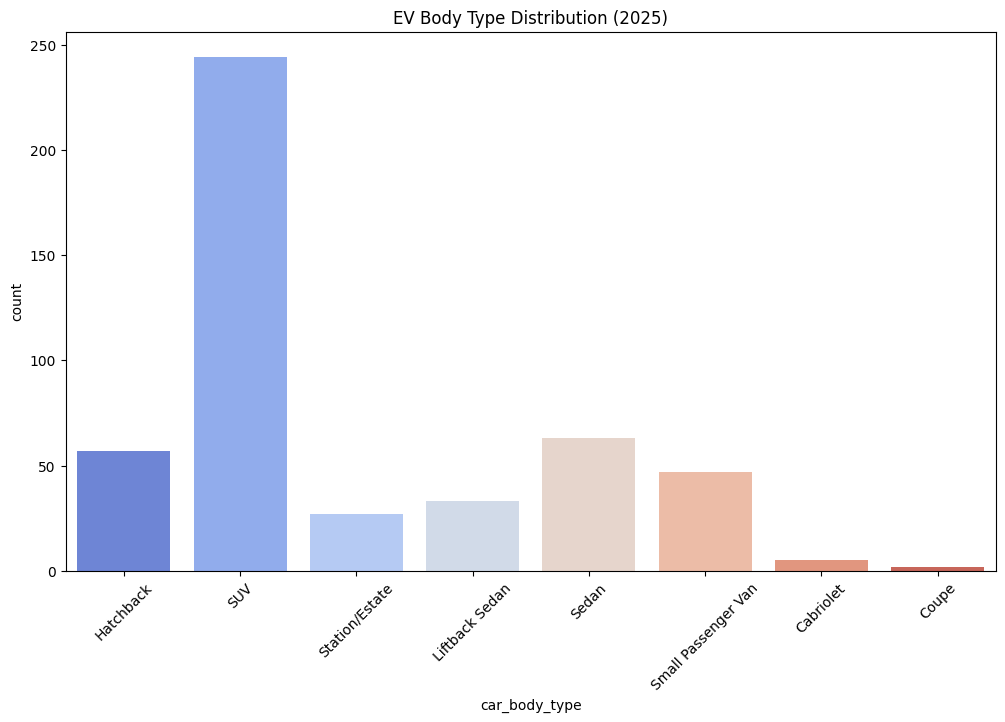

In [298]:
plt.figure(figsize=(12,7))
sns.countplot(x='car_body_type', data=df,hue='car_body_type',palette='coolwarm')
plt.title("EV Body Type Distribution (2025)")
plt.xticks(rotation=45)
plt.show()


In [299]:
df['drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [300]:
pd.get_dummies(df,columns=['drivetrain'],drop_first=True)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,car_body_type,source_url,top_speed_kmh_skew,number_of_cells_skew,acceleration_0_100_s_skew,efficiency_wh_per_km_skew,torque_nm_skew,cargo_volume_l_skew,drivetrain_FWD,drivetrain_RWD
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...,-0.897602,-0.217740,0.218510,-0.009825,-1.292441,-2.814377,True,False
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...,-0.897602,-0.217740,0.218510,-0.297386,-1.292441,-2.814377,True,False
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,SUV,https://ev-database.org/car/3057/Abarth-600e-S...,0.526788,-1.928168,-0.218104,0.066502,-0.527260,-0.744477,True,False
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,SUV,https://ev-database.org/car/3056/Abarth-600e-T...,0.526788,-1.928168,-0.092257,0.066502,-0.527260,-0.744477,True,False
4,Aiways,U5,150,60.0,Lithium-ion,216.0,310.0,156,315,7.5,...,SUV,https://ev-database.org/car/1678/Aiways-U5,-1.088219,0.037062,0.396823,-0.009825,-0.742623,0.204959,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,216.0,440.0,148,365,6.0,...,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...,0.788166,0.037062,-0.175537,-0.341264,-0.031253,0.446403,False,True
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,216.0,343.0,148,265,5.9,...,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD,0.248162,0.037062,-0.218104,-0.341264,-0.539008,-0.727808,False,True
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,216.0,343.0,146,360,5.6,...,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...,0.248162,0.037062,-0.349741,-0.431288,-0.539008,-0.727808,False,True
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,216.0,543.0,153,350,3.8,...,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...,0.248162,0.037062,-1.298623,-0.129028,0.404801,-0.727808,False,False


In [301]:
df=df.drop('drivetrain',axis=1)